# Autómata Finito Determinista 

<p> <b>Un autómata finito determinista (abreviado AFD)</b> es un autómata finito que además es un sistema determinista; es decir, para cada estado en que se encuentre el autómata, y con cualquier símbolo del alfabeto leído, existe siempre <b>no más de una transición posible desde ese estado y con ese símbolo</b>. </h4>

<img src=https://upload.wikimedia.org/wikipedia/commons/1/11/Automata_finito.png widht="500" height = "500">

<h4><b>Definición formal</b></h4>
<p>Formalmente, se define como una 5-tupla <b>(Q, Σ, q0, δ, F)</b> donde:</p>
<p>
<p><b>Q</b> es un conjunto de estados;</p>
<p><b>Σ</b> es un alfabeto;</p>
<p><b>q0 ∈ Q</b> es el estado inicial;</p>
<p><b>δ: Q X Σ → Q </b> es una función de transición;</p>
<p><b>F ⊆ Q </b>es un conjunto de estados finales o de aceptación.</p>
</p>

<h4><b>Planteamiento del proyecto</b></h4>

<p>Bajo esta premisa he decidido recrear más o menos un automata de una maquina dispensadora de un solo producto, como por ejemplo:<br>
 una maquina dispensadora de periodicos o de una puerta que te deje pasar despues de insertar el total del precio de ir al baño en una central de autobuses. </p>


<p>Con esta idea en la mente ahora toca llevarla al código para esto lo primero sería realizar un boceto más o menos de como quedaria<br>
    este automata, el primer boceto como todo nacimiento es dificil de ver, así que hice uno en paint para poder entenderlo mejor.</p>

<img src=https://lh3.googleusercontent.com/RJjtS72eigJaEv40GBtyyWD7XBVlPsJ1VBxlPDWlBeypOakGaxwA78NwjlXX7Mge1L7gt9ZlJfkjZ07JF_bEEmByY9Fx-VMXxWYPH4EH height = "500" >
	


<p>
Lo principal de este autómata es que su alfabeto consta de todas las monedas posibles que son <b>1,2,5,10</b>por lo que cada estado tiene 4 direcciones <br>
para realizar el autómata coloque <b>11 estados</b>, un estado inicial que es el <b>E1</b> , y un estado final que es el <b>E10</b>, en este caso todos los caminos se<br>
rigen a partir de la idea de insertar mayor o igual a 10 en monedas para llegar a <b>E10</b>, por esto mismo los caminos van en <b>circulo por ejemplo  <br>
al poner solo monedas de 1 peso</b> el camino que tomas es una linea que pasa por todos los estados. También <b>otro ejemplo sería al poner de 2 en 2<br>
</b> el camino que quedaría sería uno con 5 estados, los caminos están hechos de esta manera para poder hacerlo más fácil, en este caso el cambio<br>
es generado por el código de python ya que en el automata solo somos capaces de saber si llegó a la meta de 10 (lo que cuesta el producto), por lo tanto<br>
el código lo que hace es sumar todas las monedas que hemos insertado y a estas restarles 10 para poder obtener el monto del cambio
 </p>

<h4><b>Comienzo del código </b></h4>
<p>
Para empezar con este programa recordemos las partes de un automata, aqui inicio una variable llamada <b>afd</b> la cual es un diccionario<br>
en el cual usamos las partes del afd como llaves del diccionario con esto me refiero a <b>"estado","alfabeto","transicion_funcion","estado inicial"<br>
y estado_final</b> y en el caso de <b>"estados"</b> los datos del diccionario son strings con los nombres de los estados, el <b>alfabeto</b> usa como datos obviamente<br>
los símbolos que en este caso son 1,2,5,10 , los datos dentro de <b>"transicion_funcion"</b> son otro diccionario cuya llave es una tupla de elementos<br> 
que contiene el elemento y el simbolo de entrada que determina que camino a seguir y su dato es a donde se dirige el camino luego de indicar <br>
el simbolo de entrada seleccionado, ahora <b>"estado_inicial" y "estado_final" </b> el primero solo tiene como dato un estado el cual es el de inicio y<br>
el estado final contiene un conjunto de estados que en este caso solo tenemos uno pero podrian ser más de uno el estado <b>incial es E0  y el final E10</b>

 
</p>

In [1]:
#diccionario con todos los elementos de un AFD (Q, Σ, q0, δ, F)
afd = {
    "estados": {"E0", "E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9", "E10"},
    "alfabeto": {5, 10, 2, 1},
    "transicion_funcion": {
        ("E0", 1): "E1",
        ("E0", 2): "E2",
        ("E0", 5): "E5",
        ("E0", 10): "E10",
        ("E1", 1): "E2",
        ("E1", 2): "E3",
        ("E1", 5): "E6",
        ("E1", 10): "E10",
        ("E2", 1): "E3",
        ("E2", 2): "E4",
        ("E2", 5): "E7",
        ("E2", 10): "E10",
        ("E3", 1): "E4",
        ("E3", 2): "E5",
        ("E3", 5): "E8",
        ("E3", 10): "E10",
        ("E4", 1): "E5",
        ("E4", 2): "E6",
        ("E4", 5): "E9",
        ("E4", 10): "E10",
        ("E5", 1): "E6",
        ("E5", 2): "E7",
        ("E5", 5): "E10",
        ("E5", 10): "E10",
        ("E6", 1): "E7",
        ("E6", 2): "E8",
        ("E6", 5): "E10",
        ("E6", 10): "E10",
        ("E7", 1): "E8",
        ("E7", 2): "E9",
        ("E7", 5): "E10",
        ("E7", 10): "E10",
        ("E8", 1): "E9",
        ("E8", 2): "E10",
        ("E8", 5): "E10",
        ("E8", 10): "E10",
        ("E9", 1): "E10",
        ("E9", 2): "E10",
        ("E9", 5): "E10",
        ("E9", 10): "E10",
    },
    "estado_inicial": "E0",
    "estado_final": {"E10"},
}

<h4><b>tabla de transiciones</b></h4>
<p>
crea una tabla de transiociones recorriendo el diccionario AFD
<p>

In [2]:
print("Tabla de Transiciones:")
print("Estado\tMoneda\tSiguiente Estado")
for (estado, moneda), siguiente_estado in afd["transicion_funcion"].items():
    print(f"{estado}\t{moneda}\t{siguiente_estado}")

Tabla de Transiciones:
Estado	Moneda	Siguiente Estado
E0	1	E1
E0	2	E2
E0	5	E5
E0	10	E10
E1	1	E2
E1	2	E3
E1	5	E6
E1	10	E10
E2	1	E3
E2	2	E4
E2	5	E7
E2	10	E10
E3	1	E4
E3	2	E5
E3	5	E8
E3	10	E10
E4	1	E5
E4	2	E6
E4	5	E9
E4	10	E10
E5	1	E6
E5	2	E7
E5	5	E10
E5	10	E10
E6	1	E7
E6	2	E8
E6	5	E10
E6	10	E10
E7	1	E8
E7	2	E9
E7	5	E10
E7	10	E10
E8	1	E9
E8	2	E10
E8	5	E10
E8	10	E10
E9	1	E10
E9	2	E10
E9	5	E10
E9	10	E10


<p><b>Transiciones</b><br>Es una lista que contiene todas las transiciones del <b>AFD</b>. Se construye mediante un ciclo que recorre el diccionario de transiciones del AFD y agrega las tuplas<br>
 (estado_actual, estado_siguiente) a la lista. lo utilizo más adelante para representar el <b>AFD</b> con un grafo </p>

In [3]:
transiciones = [(key[0], value) for key, value in afd["transicion_funcion"].items()]
print(transiciones)

[('E0', 'E1'), ('E0', 'E2'), ('E0', 'E5'), ('E0', 'E10'), ('E1', 'E2'), ('E1', 'E3'), ('E1', 'E6'), ('E1', 'E10'), ('E2', 'E3'), ('E2', 'E4'), ('E2', 'E7'), ('E2', 'E10'), ('E3', 'E4'), ('E3', 'E5'), ('E3', 'E8'), ('E3', 'E10'), ('E4', 'E5'), ('E4', 'E6'), ('E4', 'E9'), ('E4', 'E10'), ('E5', 'E6'), ('E5', 'E7'), ('E5', 'E10'), ('E5', 'E10'), ('E6', 'E7'), ('E6', 'E8'), ('E6', 'E10'), ('E6', 'E10'), ('E7', 'E8'), ('E7', 'E9'), ('E7', 'E10'), ('E7', 'E10'), ('E8', 'E9'), ('E8', 'E10'), ('E8', 'E10'), ('E8', 'E10'), ('E9', 'E10'), ('E9', 'E10'), ('E9', 'E10'), ('E9', 'E10')]


<b>"estado_actual"</b>: Es una variable que almacena el estado actual del AFD. Se inicializa con el estado inicial.<br>
<b>"cambio_total": </b>Es una variable que acumula el valor total de las monedas ingresadas por el usuario.<br>
<b>"estados_visitados"</b>: Es una lista que almacena los estados visitados durante la simulación.<br>

In [4]:
estado_actual = afd["estado_inicial"]
cambio_total = 0
estados_visitados = [estado_actual]

<p><b>Bucle while</b></p>
<p>El código utiliza un bucle while para simular la operación de la <b>máquina dispensadora</b> hasta alcanzar un estado final En cada iteración, se solicita al usuario ingresar<br>
 el valor de una moneda. Si el valor ingresado no está en el alfabeto del AFD, se muestra un mensaje de error y se solicita otro valor.</p>
 <p><b>Cambio de estados</b></p>
 <p>Se actualiza el estado actual del <b>AFD</b> utilizando la <b>función de transición</b> correspondiente al <b>estado actual y el valor de la moneda ingresada</b>.<br>
Se acumula el valor de la moneda en la<b> variable "cambio_total"</b>.<b>El estado actual</b> se agrega a la lista de <b>"estados_visitados"</b>.</p>

<p><b>Impresión del resultados</b><br>
<p>Si el cambio es mayor que 0, se muestra un mensaje indicando que el producto ha sido dispensado y se muestra el valor del cambio.<br>
Si el cambio es menor o igual a 0, se muestra un mensaje indicando que el producto ha sido dispensado.</p>


In [5]:
#bucle que recorre el afd para ingresar las monedas
while estado_actual not in afd["estado_final"]:
    moneda = int(input("Ingresa una moneda (5/10/2/1): "))

    if moneda not in afd["alfabeto"]:
        print("Moneda inválida. Inténtalo de nuevo.")
        continue

#se actualiza el estado actual se suman todas las monedas y se le resta 10 para obtener el cambio en el caso de que cambio > 0
    estado_actual = afd["transicion_funcion"].get((estado_actual, moneda))
    cambio_total += moneda
    estados_visitados.append(estado_actual)
    cambio = cambio_total - 10
#impresion de resultados
if cambio > 0:
    print("¡Producto dispensado!")
    print("Tu cambio es:", cambio)
else:
    print("¡Producto dispensado!")

¡Producto dispensado!
Tu cambio es: 7


<h4><b>Representar con un grafo</b></h4>
<p>Primero importamos las librerias de <b>networkx</b> y <b>matplotlib</b> para crear el grafo, que en este caso decidó llamarlo <b>g</b></p>


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()

<p><b>Agregar nodos y aristas </b></p>


In [7]:
# se agregan los nodos desde el diccionario afd en la llave de estados
g.add_nodes_from(afd["estados"])
# las aristas se agregan desde el anterior mencionado transiciones
g.add_edges_from(transiciones)

<p><b>visualización de los nodos</b></p>
<p> 
primero creamos un <b>arreglo</b> para almacenar los colores de los estados si un estado es visitado el color será <b>rojo</b> y en otro caso será <b>azul</b><br>
por ultimo <b>dibujamos el grafo</b> y como color de nodos colocamos el arreglo de colores.
 </p>

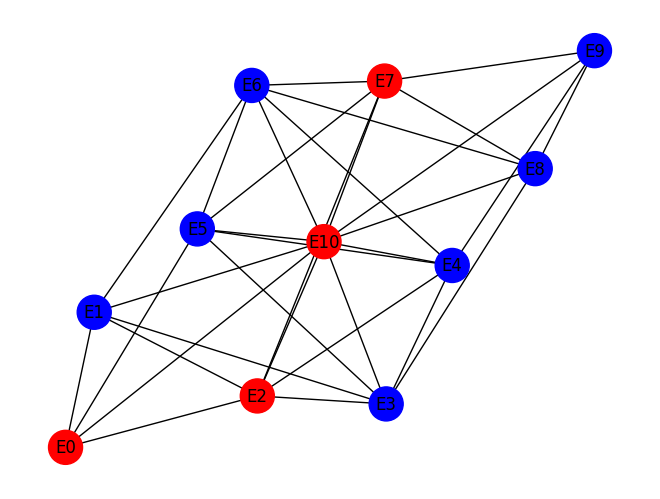

In [8]:
node_colors = ["red" if node in estados_visitados else "blue" for node in g.nodes()]
nx.draw(g, with_labels=True, node_color=node_colors, node_size=600)
plt.show()

<h4><b>    
Otra representación
</b></h4>

<p>
para empezar con esta representación debemos saber los estados visitados utilizando este código a partir de los estados visitados genera un arreglo de tuplas<br>
con las uniones que hay en el camino
</p>

In [9]:
transiciones_visitadas = [
    (estados_visitados[i], estados_visitados[i + 1])
    for i in range(len(estados_visitados) - 1)
]
print(transiciones_visitadas)

[('E0', 'E2'), ('E2', 'E7'), ('E7', 'E10')]


<p><b>
Creacion del grafo
</b></p>
<p>
creamos el <b>grafo</b> con los <b>estados visitados</b> como <b>nodos</b> y las <b>aristas</b> como las <b>transiciones_visitadas</b>
</p>

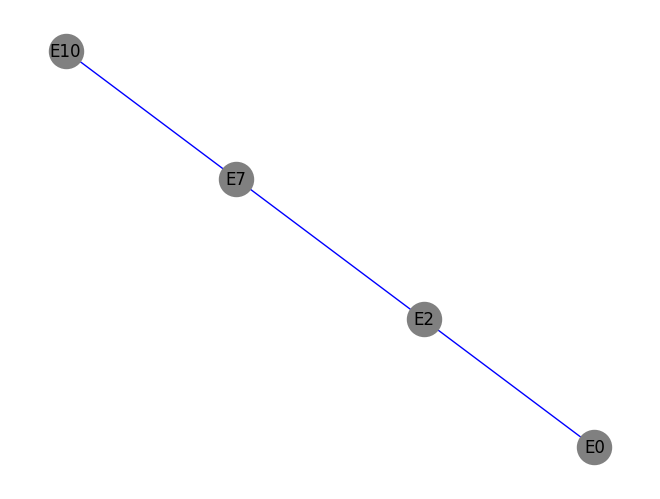

In [10]:
g1 = nx.Graph()
g1.add_nodes_from(estados_visitados)
g1.add_edges_from(transiciones_visitadas)
nx.draw(g1, with_labels=True, node_color="gray", node_size=600,edge_color = "blue")
plt.show()